## Backpropagation

### Part I. Classic

Do a forward pass (calculate green values), and a backward pass (calculate gradients, red
values).

![backprop](data/lab4_backprop.png)

Оскільки градієнт нульовий, то ваги не оновляться ($w_{new}$ = $w_{old}$ - (learning_rate * $\frac{dL}{dw_{old}}$), а у цьому прикладі $\frac{dL}{dw_{old}}$ = 0, тому при оновленні ваг отримаємо $w_{new}$ = $w_{old}$)

### Part II. Some coding bits

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def affine(x, w, b):
    return w * x + b


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def gaussian(x):
    return np.exp(-x * x)


def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))


def mse(y, yout):
    return np.mean((y - yout) * (y - yout))

In [33]:
x = 1.0

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

In [34]:
### do the forward pass of the network
z_2, z_3 = 0, 0


def forward():
    global z_2, z_3
    z_2 = affine(x, w_1, b_1)
    h_1_2 = sigmoid(z_2)
    z_3 = h_1_2 @ w_2 + b_2


forward()

In [35]:
z_3

array([1.38079708])

In [36]:
y1 = gaussian(x)
y1

np.float64(0.36787944117144233)

In [37]:
loss1 = mse(y1, z_3)
loss1

np.float64(1.0260021389535428)

Is the output of the network close to the actual value? Ні, результат мережі значно більший за справжній результат

In [38]:
#### DERIVATIVES CALCULATION
### enter your code here

dz_3 = 2 * (z_3 - y1)

dw_2 = dz_3 * sigmoid(z_2)
db_2 = dz_3

dz_2 = dz_3 * w_2 * sigmoid_derivative(z_2)

dw_1 = dz_2 * x
db_1 = dz_2

##### WEIGHTS UPDATE
### enter your code here
lr = 0.01

w_1 -= lr * dw_1
w_2 -= lr * dw_2

b_1 -= lr * db_1
b_2 -= lr * db_2

In [39]:
### do again the forward pass of the network
forward()

In [40]:
z_3

array([1.33676033])

In [41]:
y2 = gaussian(x)
y2

np.float64(0.36787944117144233)

In [42]:
loss2 = mse(y2, z_3)
loss2

np.float64(0.9387301775781403)

In [43]:
loss1 - loss2

np.float64(0.0872719613754025)

Did output become closer to the actual value of the function?
Так, отримане значення стало дійсно ближчим до справжнього. Weights та biases оновилися і після нового forward pass помилка зменшилась на 0.09

### wrap things in to a loop

In [44]:
N = 50000
lr = 0.01

In [45]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])

for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    #### FORWARD PASS
    z_2, z_3 = 0, 0
    forward()

    #### DERIVATIVES CALCULATION
    dz_3 = 2 * (z_3 - actual)

    dw_2 = dz_3 * sigmoid(z_2)
    db_2 = dz_3

    dz_2 = dz_3 * w_2 * sigmoid_derivative(z_2)

    dw_1 = dz_2 * x
    db_1 = dz_2

    ##### WEIGHTS UPDATE
    w_1 -= lr * dw_1
    w_2 -= lr * dw_2

    b_1 -= lr * db_1
    b_2 -= lr * db_2

Now let's plot things and see what they look like.

In [46]:
z1 = affine(X, w_1[0], b_1[0])
z2 = affine(X, w_1[1], b_1[1])

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

z3 = h1 * w_2[0] + h2 * w_2[1] + b_2
out = z3

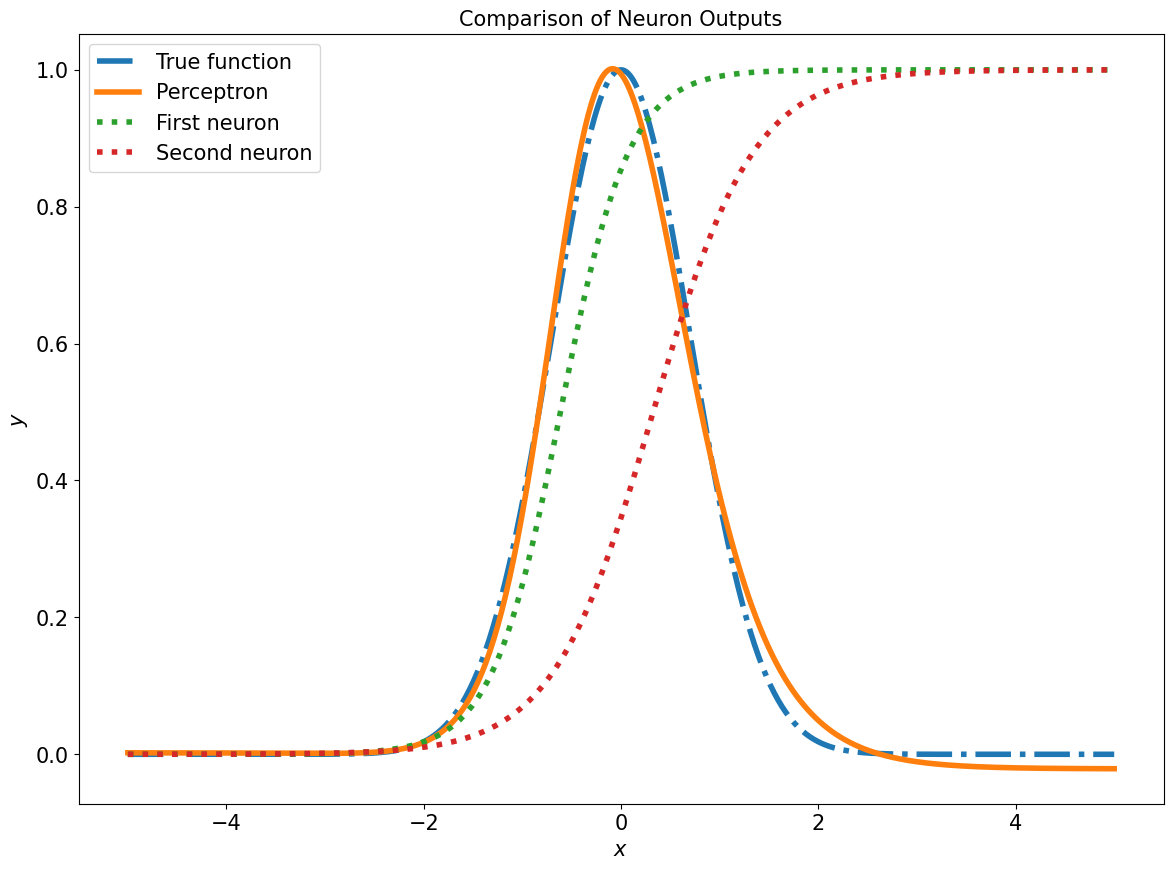

In [47]:
### Uncomment and run when z's and h's computed

SIZE = 15

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.plot(X, gaussian(X), lw=4, ls='-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
ax.plot(X, h1, lw=4, label='First neuron', ls=':')
ax.plot(X, h2, lw=4, label='Second neuron', ls=':')

# # Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# # Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE)  # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best')  # Create a legend and make it big enough to read

Ця мережа з прихованим шаром з двох нейронів успішно апроксимує функцію Гауса

### Classification problem

Fill out the code for the following classification problem. Implement:
- foward pass
- backward pass
- weight updates

In [48]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

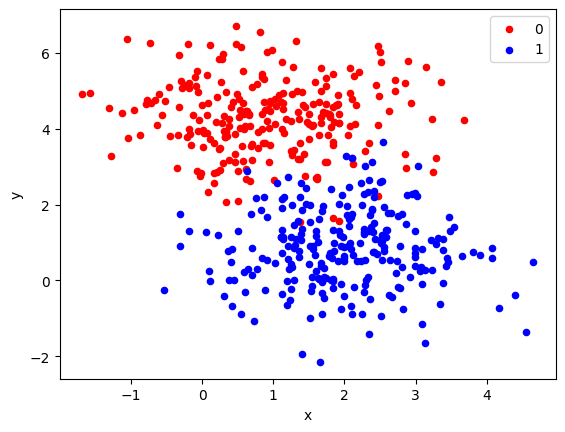

In [49]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
colors = {0: 'red', 1: 'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
x = X_test

In [53]:
##### initialization ('ones')
w_1 = np.array([1, 1])
b_1 = np.array([1])

In [54]:
z1 = x @ w_1 + b_1
# Node outputs
h1 = sigmoid(z1)

### Check the accuracy

In [55]:
pred = [int(score > 0.5) for score in h1]
sum(pred == y_test) / len(y_test)

np.float64(0.45)

### generalization ==> wrap into a proper loop

In [56]:
### Loop

In [57]:
N = 10000  # epochs

In [58]:
batch_size = 16  # 2, 4, 8, 16, 32, ... 10 is also an example

##### initialization

w_1 = np.array([1., 1.])
b_1 = np.array([1.])
lr = 0.01

for i in range(N):
    perm = np.random.permutation(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    for batch_id in range(int(len(X_train) / batch_size)):
        x = X_train[batch_id * batch_size:(batch_id + 1) * batch_size]
        y = y_train[batch_id * batch_size:(batch_id + 1) * batch_size]

        m = x.shape[0]
        #### FORWARD PASS
        z_1 = x @ w_1 + b_1
        h_1 = sigmoid(z_1)

        #### DERIVATIVES CALCULATION
        dz1 = h_1 - y
        dw1 = (x.T @ dz1) / m
        db1 = np.sum(dz1) / m

        ##### WEIGHTS UPDATE
        w_1 -= lr * dw1
        b_1 -= lr * db1


![backprop_classification_problem](data/lab4_backprop_classification_problem.png)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
### check the accuracy on the test set
y_pred = sigmoid(X_test @ w_1 + b_1)
accuracy_score(y_test, y_pred > 0.5)

0.95

Ця нейронна мережа проводить класифікацію з accuracy 0.95. Оскільки це класифікація між двома класами, то для loss функції я використав binary cross entropy